### 라이브러리와 데이터 정의 

In [305]:
import matplotlib.pyplot as plt

JOBS={
    'A':{'release':2,'duration':5 ,'due':10},
    'B':{'release':5,'duration':6 ,'due':21},
    'C':{'release':4,'duration':8 ,'due':15},
    'D':{'release':0,'duration':4 ,'due':10},
    'E':{'release':0,'duration':2 ,'due':5},
    'F':{'release':8,'duration':3 ,'due':15},
    'G':{'release':9,'duration':2 ,'due':22}
}   

### 간트차트 함수 생성 

release와 due 반영해 기한을 그래프에 그리기 

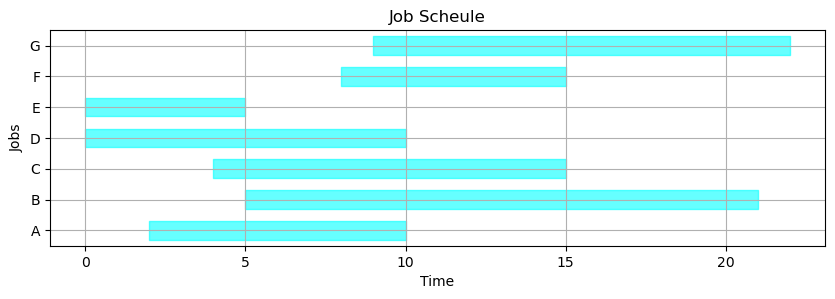

In [306]:
def gantt(JOBS):
    bw=0.3 #bar width 설정 
    plt.figure(figsize=(10,0.4*(len(JOBS.keys())))) #그래프 크기 정하기

    idx=0
    for j in sorted(JOBS.keys()):
        x=JOBS[j]['release']
        y=JOBS[j]['due']
        plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw],color='cyan',alpha=0.6)

        idx+=1
    plt.ylim(-0.5,idx-0.5)
    plt.title('Job Scheule')
    plt.xlabel('Time')
    plt.ylabel('Jobs')
    plt.yticks(range(len(JOBS)),JOBS.keys())
    plt.grid()
    
gantt(JOBS)

Schedule 딕셔너리 만들기

In [307]:
def schedule(JOBS,order=sorted(JOBS.keys())):
    #작업의 order을 입력받아 dictionary 작업의 일정을 생성하는 함수
    #일정계획수립 방법에 따라 order가 지정 가능 
    SCHEDULE={}
    start=0
    finish=0
    for job in order:
        #작업의 시작시간과 종료시간을 계산
        #작업의 시작시간은 작업의 release 시간과 이전 작업의 종료시간 중 큰 값
        start=max(JOBS[job]['release'],finish)
        #작업의 종료시간은 시작시간에 작업의 duration을 더한 값
        finish=start+JOBS[job]['duration']
        SCHEDULE[job]={'start':start,'finish':finish}
    return SCHEDULE
#order을 랜덤으로 지정해줌 
SCHEDULE=schedule(JOBS,['E','D','A','F','G','C','B'])
print(SCHEDULE)

{'E': {'start': 0, 'finish': 2}, 'D': {'start': 2, 'finish': 6}, 'A': {'start': 6, 'finish': 11}, 'F': {'start': 11, 'finish': 14}, 'G': {'start': 14, 'finish': 16}, 'C': {'start': 16, 'finish': 24}, 'B': {'start': 24, 'finish': 30}}


pprint 모듈을 사용하여 출력 형식을 예쁘게 하기   
보기 편하게 하기 위해 자동으로 SCHEDULE의의 key를 정렬해서 출력해줌 

In [308]:
import pprint as pp 
SCHEDULE=schedule(JOBS,['E','D','A','F','G','C','B'])
pp.pprint(SCHEDULE)

{'A': {'finish': 11, 'start': 6},
 'B': {'finish': 30, 'start': 24},
 'C': {'finish': 24, 'start': 16},
 'D': {'finish': 6, 'start': 2},
 'E': {'finish': 2, 'start': 0},
 'F': {'finish': 14, 'start': 11},
 'G': {'finish': 16, 'start': 14}}


스케쥴을 원 간트차트 그래프에 덮어 그리기 

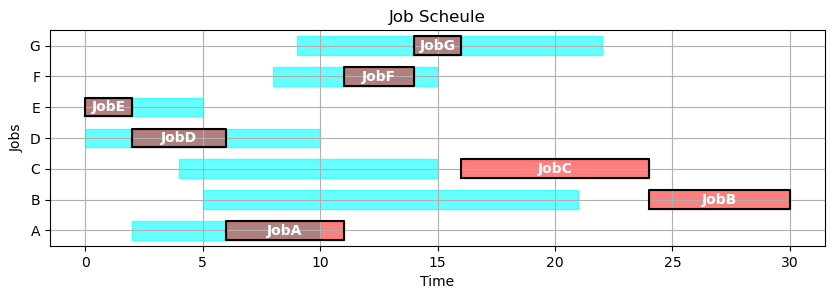

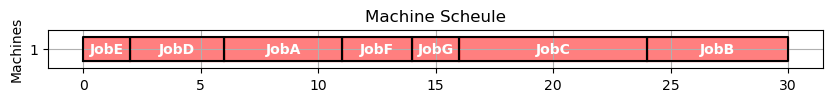

In [309]:
def gantt(JOBS,SCHEDULE={}):
    bw=0.3 #bar width 설정 
    plt.figure(figsize=(10,0.4*(len(JOBS.keys())))) #그래프 크기 정하기

    idx=0
    for j in sorted(JOBS.keys()):
        x=JOBS[j]['release']
        y=JOBS[j]['due']
        plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw],color='cyan',alpha=0.6)

        #스케쥴 그래프를 원 그래프에 덮어 그리기 
        if j in SCHEDULE.keys():
            x=SCHEDULE[j]['start']
            y=SCHEDULE[j]['finish']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw],color='red',alpha=0.5)
            plt.plot([x,y,y,x,x],[idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='k')
            #plt.text(x축 위치,y축 위치,text)
            plt.text((SCHEDULE[j]['start']+SCHEDULE[j]['finish'])/2.0,idx,'Job'+j,color='white',weight='bold',horizontalalignment='center',verticalalignment='center')
        idx+=1
    plt.ylim(-0.5,idx-0.5)
    plt.title('Job Scheule')
    plt.xlabel('Time')
    plt.ylabel('Jobs')
    plt.yticks(range(len(JOBS)),JOBS.keys())
    plt.grid()
    xlim=plt.xlim()

    #스케쥴 그래프만 따로 그리기
    if SCHEDULE:
        for j in SCHEDULE.keys():
            if 'machine' not in SCHEDULE[j].keys():
                #스케쥴에 machine 정보가 없으면 1로 초기화
                SCHEDULE[j]['machine']=1
        #현재는 machine개수가 1개인 케이스를 처리하기 때문에 set으로 중복 제거 시 1개만 남음
        #만약 machine이 여러개인 경우에는 SCHEDULE에 machine 정보를 추가해야 함
        MACHINES=sorted(set([SCHEDULE[j]['machine'] for j in SCHEDULE.keys()]))
        plt.figure(figsize=(10,0.5*len(MACHINES)))
        for j in sorted(SCHEDULE.keys()):
            x=SCHEDULE[j]['start']
            y=SCHEDULE[j]['finish']
            idx=MACHINES.index(SCHEDULE[j]['machine'])
            #plt.fill_between(x축,y축1,y축2,색상,투명도): 채우기
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw],color='red',alpha=0.5)
            #plt.plot(x축,y축,색상) : 테두리 그리기 
            plt.plot([x,y,y,x,x],[idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='k')
            plt.text((SCHEDULE[j]['start']+SCHEDULE[j]['finish'])/2.0,idx,'Job'+j,color='white',weight='bold',horizontalalignment='center',verticalalignment='center')
        plt.xlim(xlim)
        plt.ylim(-0.5,len(MACHINES)-0.5)
        plt.title('Machine Scheule')
        plt.yticks(range(len(MACHINES)),MACHINES)
        plt.ylabel('Machines')
        plt.grid()
gantt(JOBS,SCHEDULE)

### 핵심 성과 지표 계산 함수 작성 (KPI)   
Makespan: 마지막 작업의 완료 시간   
Max Past Due: 납기를 지난 작업의 최대 지연시간   
Sum of Past Due: 납기를 지난 작업의 지연시간의 합   
Number of Past Due: 납기를 지난 작업의 수   
Number of on time: 납기를 지킨 작업의 수   
Fraction on time: 납기를 지킨 작업의 비율   

In [310]:
def kpi(JOBS,SCHEDULE):
    KPI={}
    KPI['Makespan']=max([SCHEDULE[j]['finish'] for j in SCHEDULE.keys()])
    KPI['Max Pastdue']=max(
        max(0,SCHEDULE[job]['finish']-JOBS[job]['due']) for job in SCHEDULE.keys() if SCHEDULE[job]['finish']>JOBS[job]['due']
    )
    KPI['Sum of Pastdue']=sum(
        max(0,SCHEDULE[job]['finish']-JOBS[job]['due']) for job in SCHEDULE.keys() if SCHEDULE[job]['finish']>JOBS[job]['due']
    )
    KPI['Number of Pastdue']=sum(
        SCHEDULE[job]['finish']>JOBS[job]['due'] for job in SCHEDULE.keys()
    )
    KPI['Number of on-time']=sum(
        SCHEDULE[job]['finish']<=JOBS[job]['due'] for job in SCHEDULE.keys()
    )   
    KPI['Fraction on-time']=KPI['Number of on-time']/len(SCHEDULE)
    return KPI
kpi(JOBS,SCHEDULE)

{'Makespan': 30,
 'Max Pastdue': 9,
 'Sum of Pastdue': 19,
 'Number of Pastdue': 3,
 'Number of on-time': 4,
 'Fraction on-time': 0.5714285714285714}

## 일정 계획 수립 방법   
### 1. 우선순위 규칙(Dispatching Rules): 작업장에서 작업에 대한 우선순위에 따라 실행

(1) 선착우선(FCFS: First Come First Serve, FIFO: First In First Out)

{'Makespan': 30,
 'Max Pastdue': 13,
 'Sum of Pastdue': 31,
 'Number of Pastdue': 6,
 'Number of on-time': 1,
 'Fraction on-time': 0.14285714285714285}

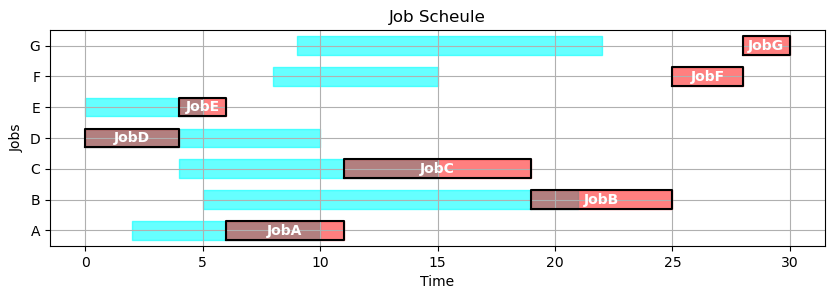

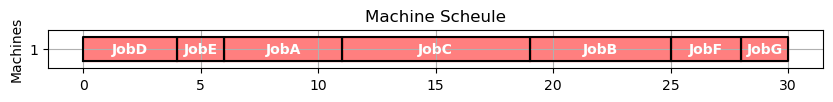

In [311]:
def fcfs(JOBS):
    #작업의 release 시간 순으로 정렬하여 스케쥴을 생성하는 함수
    order=sorted(JOBS.keys(),key=lambda j:JOBS[j]['release'])
    return schedule(JOBS,order) #schedule 함수 사용하고 order 지정 
SCHEDULE=fcfs(JOBS)
gantt(JOBS,SCHEDULE)
kpi(JOBS,SCHEDULE)

(2)후착우선(LCFS: Last Come First Served, LIFO: Last In First Out)

딕셔너리 values 비교해 key값을 반환하는 함수 문법 
| 표현                                    | 의미                              |
| ------------------------------------- | ------------------------------- |
| `max(candidates)`                     | key 중에서 사전순으로 가장 큰 것 (value 무시) |
| `max(candidates, key=candidates.get)` | value가 가장 큰 key 반환              |
| `max(candidates.values())` | 가장 큰 value 반환              |


{'Makespan': 30,
 'Max Pastdue': 25,
 'Sum of Pastdue': 47,
 'Number of Pastdue': 4,
 'Number of on-time': 3,
 'Fraction on-time': 0.42857142857142855}

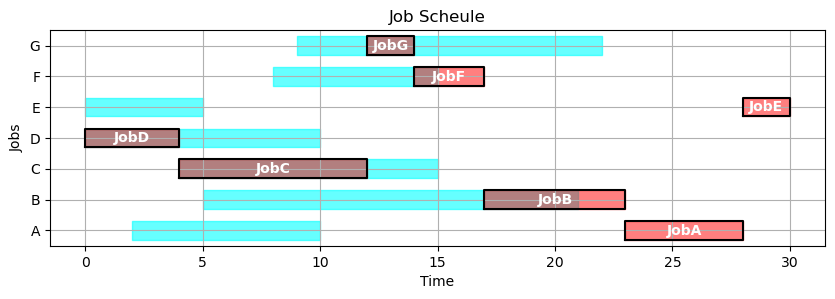

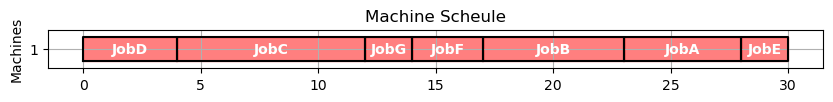

In [312]:
def lcfs(JOBS):
    unfinished_jobs=set(JOBS.keys())
    start=0
    while len(unfinished_jobs)>0:
        #맨 처음 start는 0, 그 다음부터는 전 작업의 종료시간으로 설정
        #전 작업의 종료시간에 release된 unfinished_jobs가 없다면 
        #unfinished_jobs 중 release가 가장 빠른 작업의 release 시간으로 설정
        start=max(start,min(JOBS[job]['release'] for job in unfinished_jobs))
        #전 작업 종료 시간보다 빠르거나 같은 release 시간을 가진 unfinished_jobs를 candidates에 저장
        candidates={job:JOBS[job]['release'] for job in unfinished_jobs
                    if JOBS[job]['release']<=start}
        #candidates의 value(candidates.get)을 기준으로 max()를 사용하여 가장 늦게 도착한 job을 선택
        job=max(candidates,key=candidates.get)
        finish=start+JOBS[job]['duration']
        unfinished_jobs.remove(job)
        #현재 작업의 일정을 SCHEDULE에 저장
        #새로운 SCHEDULE 딕셔너리 새로 생성 
        SCHEDULE[job]={'machine':1,'start':start,'finish':finish}
        start=finish
    return SCHEDULE
SCHEDULE=lcfs(JOBS)
gantt(JOBS,SCHEDULE)
kpi(JOBS,SCHEDULE)

SPT,LOT 두 작업 범용화 함수 작성 (응용) 

In [313]:
def spt_lot(JOBS,obj=min):
    unfinished_jobs=set(JOBS.keys())
    start=0
    while len(unfinished_jobs)>0:
        start=max(start,min(JOBS[job]['release'] for job in unfinished_jobs))
        candidates={job:JOBS[job]['duration'] for job in unfinished_jobs
                    if JOBS[job]['release']<=start}
        if obj==min:
            job=min(candidates,key=candidates.get)
            finish=start+JOBS[job]['duration']
            unfinished_jobs.remove(job)
            SCHEDULE[job]={'machine':1,'start':start,'finish':finish}
            start=finish
        if obj==max:
            job=max(candidates,key=candidates.get)
            finish=start+JOBS[job]['duration']
            unfinished_jobs.remove(job)
            SCHEDULE[job]={'machine':1,'start':start,'finish':finish}
            start=finish
    return SCHEDULE

(3) 최소작업시간우선(SOT/SPT: Shortest Operation/Processing Time)

{'Makespan': 30,
 'Max Pastdue': 15,
 'Sum of Pastdue': 18,
 'Number of Pastdue': 4,
 'Number of on-time': 3,
 'Fraction on-time': 0.42857142857142855}

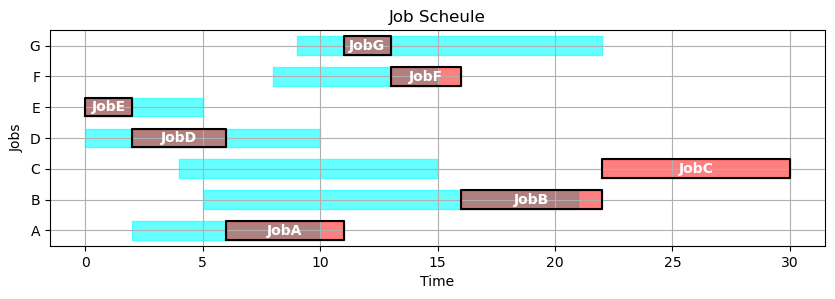

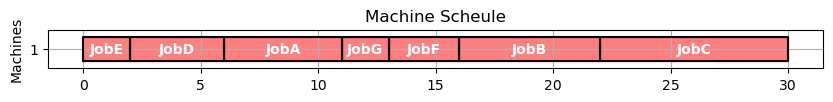

In [314]:
SCHEDULE=spt_lot(JOBS,obj=min) #spt
gantt(JOBS,SCHEDULE)
kpi(JOBS,SCHEDULE)


(4)최대 작업시간 우선(LOT: Longest Operation/Processing Time)

{'Makespan': 30,
 'Max Pastdue': 25,
 'Sum of Pastdue': 55,
 'Number of Pastdue': 4,
 'Number of on-time': 3,
 'Fraction on-time': 0.42857142857142855}

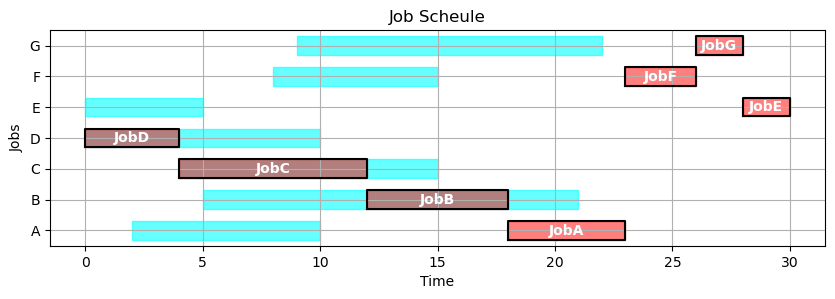

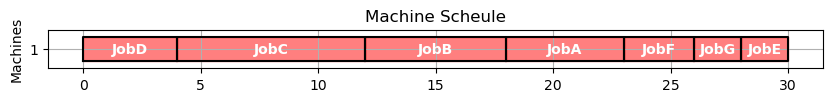

In [315]:
SCHEDULE=spt_lot(JOBS,obj=max) #lot
gantt(JOBS,SCHEDULE)
kpi(JOBS,SCHEDULE)

(5)최소 납기 우선(EDD: Earlist Due Date)

{'Makespan': 30,
 'Max Pastdue': 8,
 'Sum of Pastdue': 23,
 'Number of Pastdue': 4,
 'Number of on-time': 3,
 'Fraction on-time': 0.42857142857142855}

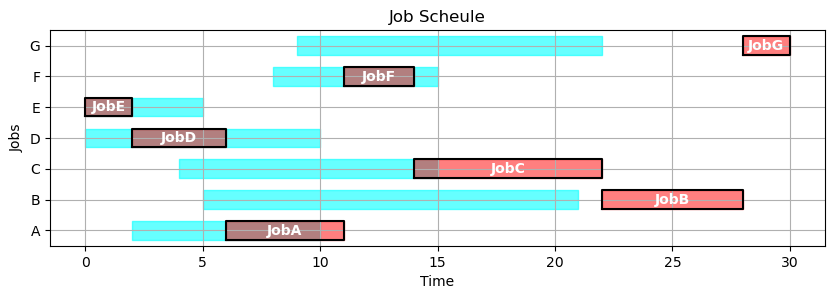

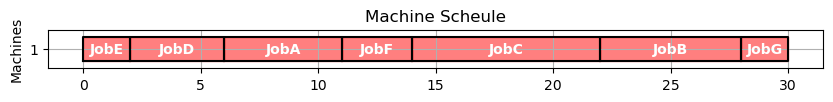

In [316]:
def edd(JOBS):
    unfinished_jobs = set(JOBS.keys())
    start=0
    while len(unfinished_jobs)>0:
        start=max(start,min(JOBS[job]['release'] for job in unfinished_jobs))
        candidates={job:JOBS[job]['due'] for job in unfinished_jobs
                    if JOBS[job]['release']<=start}
        job=min(candidates,key=candidates.get)
        finish=start+JOBS[job]['duration']
        unfinished_jobs.remove(job)
        SCHEDULE[job]={'machine':1,'start':start,'finish':finish}
        start=finish
    return SCHEDULE

SCHEDULE=edd(JOBS)
gantt(JOBS,SCHEDULE)
kpi(JOBS,SCHEDULE)

범용화 함수 작성
| `target` 값   | 원래부터 JOBS에 있음 | dispatching 내부 계산 필요|
| ------------ | -------------- | --------------------- |
| `'release'`  | ✅ 있음           | ❌ 계산 안 해도 됨           |
| `'due'`      | ✅ 있음           | ❌ 계산 안 해도 됨           |
| `'duration'` | ✅ 있음           | ❌ 계산 안 해도 됨           |
| `'slack'`    | ❌ 없음           | ✅ 계산 필요               |
| `'cr'`       | ❌ 없음           | ✅ 계산 필요               |
| `'rand'`     | ❌ 없음           | ✅ 계산 필요               |

`if target==' '`사용해 내부 계산 


In [317]:
import random
def dispatching(JOBS,target='duration',obj=min):
    unfinished_jobs=set(JOBS.keys())
    start=0
    while len(unfinished_jobs)>0:
        start=max(start, min(JOBS[job]['release'] for job in unfinished_jobs))
        if target=='rand':
            for job in unfinished_jobs:
                #0에서 1 사이의 랜덤값을 생성하여 JOBS 딕셔너리에 저장
                JOBS[job][target]=random.random()
        if target =='slack':
            for job in unfinished_jobs:
                #slack 계산: 납기잔여시간(due-start)-작업잔여시간(duration)
                JOBS[job][target]=(JOBS[job]['due']-start)-JOBS[job]['duration']
        if target=='cr':
            for job in unfinished_jobs:
                #cr 계산: 납기잔여시간(due-start)/작업잔여시간(duration)
                JOBS[job][target]=(JOBS[job]['due']-start)/JOBS[job]['duration']
        #target에 따라 candidates를 생성
        candidates={job:JOBS[job][target] for job in unfinished_jobs
                    if JOBS[job]['release']<=start}
        #각 target에 따라 obj를 사용하여 job을 선택
        job=obj(candidates,key=candidates.get)
        finish=start+JOBS[job]['duration']
        unfinished_jobs.remove(job)
        SCHEDULE[job]={'machine':1,'start':start,'finish':finish}
        start=finish
    return SCHEDULE


(6)최소 여유시간 우선(LST: Least Slack Time):    
SlackTime = 납기잔여시간-작업잔여시간 

{'Makespan': 30,
 'Max Pastdue': 8,
 'Sum of Pastdue': 27,
 'Number of Pastdue': 5,
 'Number of on-time': 2,
 'Fraction on-time': 0.2857142857142857}

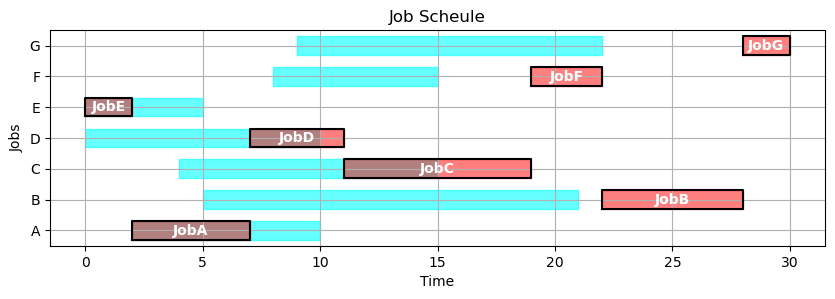

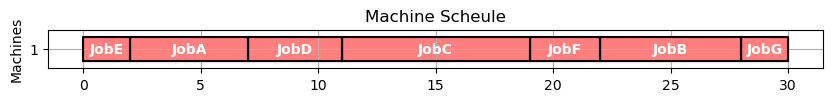

In [318]:
SCHEDULE=dispatching(JOBS,target='slack',obj=min)
gantt(JOBS,SCHEDULE)
kpi(JOBS,SCHEDULE)

(7)무작위(RAND: Random Selection)

{'Makespan': 30,
 'Max Pastdue': 15,
 'Sum of Pastdue': 28,
 'Number of Pastdue': 3,
 'Number of on-time': 4,
 'Fraction on-time': 0.5714285714285714}

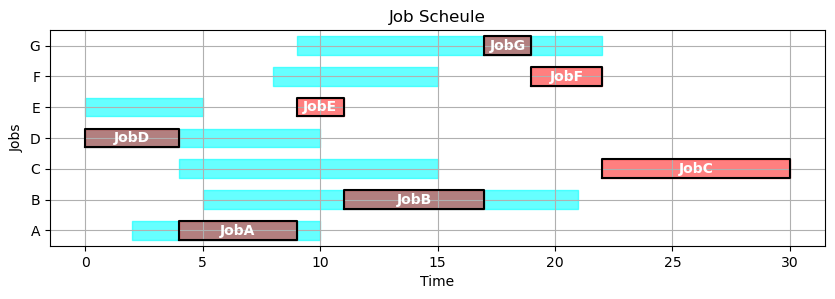

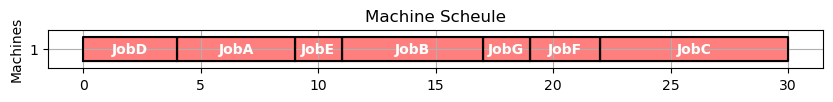

In [319]:
SCHEDULE=dispatching(JOBS,target='rand',obj=min)
gantt(JOBS,SCHEDULE)
kpi(JOBS,SCHEDULE)

(8)긴급률법(CR: Critical Ratio):   
CR = 납기잔여시간/작업작여시간

{'Makespan': 30,
 'Max Pastdue': 8,
 'Sum of Pastdue': 28,
 'Number of Pastdue': 6,
 'Number of on-time': 1,
 'Fraction on-time': 0.14285714285714285}

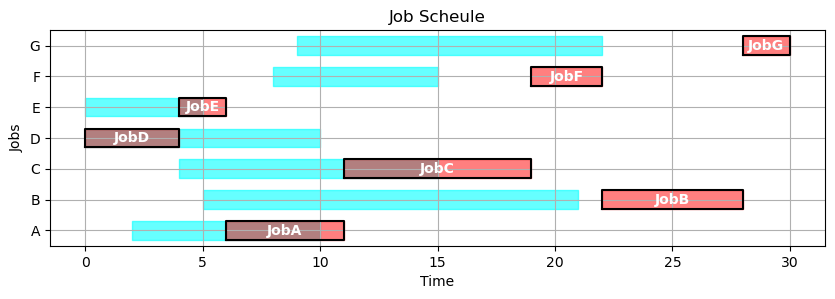

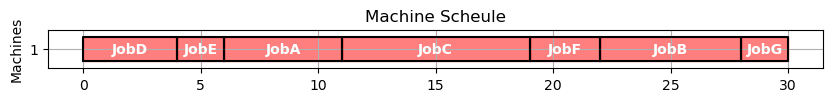

In [320]:
SCHEDULE=dispatching(JOBS,target='cr',obj=min)
gantt(JOBS,SCHEDULE)
kpi(JOBS,SCHEDULE)

### 2. 다양한 최적화 알고리즘으로 수행
    (1) Job Shop Scheduling Problem(JSSP):    
    다양한 작업(Job)이 여러 기계(Machine)를 순서대로 거쳐야 하는 공정 문제   
Genetic Algorithm, Simulated Annealing, Tabu Search, Ant Colony, Optimization, Particle Swarm Optimization, etc.  

    (2) Flow Shop Scheduling Problem(FSSP):    
    모든 작업이 동일한 순서로 여러 기계를 통과하는 생산 공정   
Johnson's Algorithm(2-3r개의 머신일 때 최적 순서 결정 가능), Genetic Algorithm, Simulated Annealing, Tabu Search, etc.   

    (3) Assembly Line Balancinng(ALB):   
    조립 라인에서 각 작업을 작업자에게 효율적으로 분배하는 문제   
Genetic Algorithm, Simulated Annealing, etc.  

    (4) Project Scheduling:   
    프로젝트 전체 일정 관리   
Critical Path Method(CPM), Program Evaluation and Review Technique(PERT), etc.   

### Pyomo를 이용한 생산 일정 계획 최적화

**Convex Hull 방식으로 선형화된 정수계획(MIP) 문제**를
GLPK의 Branch & Bound 알고리즘으로 풀기

| 의사결정 변수           | 설명                                                                     |
| ------------ | ---------------------------------------------------------------------- |
| `start[j]`       | **작업 j의 시작 시간**을 나타내는 연속 변수                                            |
| `Makespan`   | **모든 작업이 완료되는 시점** (즉, 가장 마지막 작업의 종료 시간)                               |
| `pastdue[j]` | **작업 j의 납기 지연 시간** (실제 완료시간 - 납기시간) 중 0보다 큰 값                          |
| `early[j]`   | **작업 j의 선행 완료 시간** (납기시간 - 실제 완료시간) 중 0보다 큰 값                          |
| `Y[j,k]`     | **이진 변수**: 작업 j가 작업 k보다 먼저 끝나면 `0`, 그렇지 않으면 `1`<br>(※ 충돌을 방지하는 순서 결정용) |



**목적함수**  
납기 지연 시간의 합을 최소화  

**제약조건**  
1. 작업의 시작 시간은 릴리스 시간 이후여야 함   
    - release[j]<=start[j]

2. 작업시간 제약조건   
    - finish 시간 확인: start[j]+duration[j]+early[j]=due[j]+pastdue[j]   
    - early[j]>=0   
    - pastdue[j]>=0   

3. MAKESPAN보다 finish 시간이 늦을 수 없음   
    - start[j]+duration[j]<=Makespan

4. 하나의 설비에서 동시에 여러개의 작업을 수행할 수 없음. 아래의 두 제약조건 중 하나만 성립(GDP)   
    - start[j]+duration[j]<=start[k]+M(Y[j,k]), 모든 j는 k보다 작다   
    - start[k]+duration[k]<=start[j]+M(1-Y[j,k]), 모든 j는 k보다 작다


**GDP(Generalized Disjunctive Programming)**   
`(조건 A를 만족하거나) OR (조건 B를 만족해야 함)` 같은 선택 조건이 있는 수학 문제를 다루는 최적화 모델   

    - 논리와 대수적 제약을 연결하여 복잡한 제약을 표현하기 위해 사용   
    - Big-M 방법을 적용하기 위해 사용
| 객체/함수                                  | 설명                                         |
| -------------------------------------- | ------------------------------------------ |
| `Disjunct`                             | **OR 조건** 하나를 표현하는 블록 (조건적 제약들의 집합)        |
| `Disjunction`                          | 여러 `Disjunct` 중 하나 이상이 **참이어야 함**을 명시하는 조건 |


**GDP 모델은 일반 LP/IP 솔버로는 풀 수 없고, 변환이 필요**

다음 코드 사용해 변환 가능    
`TransformationFactory('gdp.bigm/gdp.chull').apply_to(m)`   

`gdp.bigm`: Big-M 방식   
 `x ≤ y + (1 - λ₁) * M   
 y ≤ x + (1 - λ₂) * M   

 λ₁ + λ₂ = 1, λ₁, λ₂ ∈ {0, 1}   

`gdp.chull`: Convex Hull 방식  
x₁, x₂, y₁, y₂는 각각의 분기에서만 등장   
분기 간 간섭 없이 더 정확하게 모델링   
 x = λ₁·x₁ + λ₂·x₂  
 y = λ₁·y₁ + λ₂·y₂

 Disjunct 1: x₁ ≤ y₁  
 Disjunct 2: y₂ ≤ x₂

 λ₁ + λ₂ = 1,  λ₁, λ₂ ∈ {0, 1}  


| 항목      | Big-M 방식                               | Convex Hull 방식                               |
| ------- | -------------------------------------- | -------------------------------------------- |
| 원리   | **제약을 완화 (느슨하게)** 하고, 이진 변수와 큰 숫자 M 사용 | **각 분기의 제약을 분리**, convex combination으로 변수 결합 |
| 변수 수 | 적음                                     | 많음 (분기별로 변수 복사)                              |
| 성능   | 느슨한 relaxation → **성능 불안정**            | tight relaxation → **빠른 수렴, 성능 좋음**          |
| 정밀도  | Big-M 설정에 따라 **부정확할 수 있음**             | 수학적으로 **tight하고 정확**                         |
| 위험   | 너무 큰 M → 수치 불안정 / 너무 작은 M → 잘못된 모델     | 안정적                                          |
| 추천 상황 | 빠르게 구조만 짜고 실험할 때                       | 정밀하게 풀고 싶을 때                                 |


In [321]:
from pyomo.environ import *
from pyomo.gdp import *

{'Makespan': 30.0,
 'Max Pastdue': 15.0,
 'Sum of Pastdue': 16.0,
 'Number of Pastdue': 2,
 'Number of on-time': 5,
 'Fraction on-time': 0.7142857142857143}

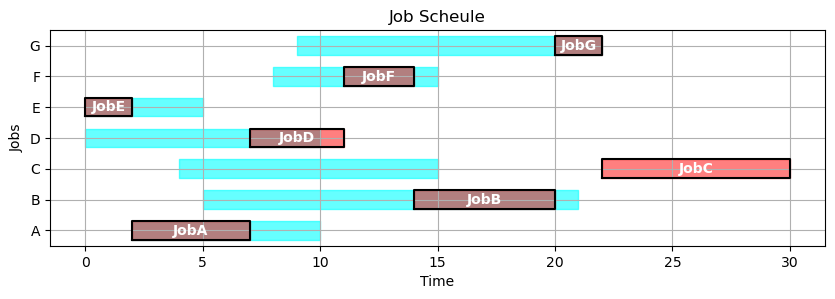

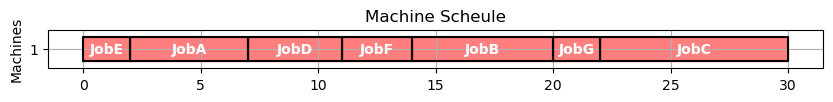

In [322]:
def opt_schedule(JOBS):
    m=ConcreteModel()
    m.J=Set(initialize=JOBS.keys())
    #job 쌍의 목록을 Set으로 정의
    #모든 작업쌍을 비교해야 하는 제약식에서 효율적
    #filter= lambda 모델, 첫번째 인자, 두번째 인자
    #2개짜리 튜플의 각 인자의 이름을 j, k로 지정
    m.PAIRS=Set(initialize=m.J*m.J,dimen=2,filter=lambda m,j,k: j<k)

    #최종 작업의 완료시간은 가장 늦은 작업의 릴리스 시간+모든 작업의 가공시간의 합보다는 작아야 함
    tmax=max([JOBS[j]['release']for j in m.J])+sum([JOBS[j]['duration'] for j in m.J])

    #결정변수 결정
    #작업시작시간
    m.start=Var(m.J,domain=NonNegativeReals,bounds=(0,tmax))
    #작업의 PASTDUE 시간
    m.pastdue=Var(m.J,domain=NonNegativeReals,bounds=(0,tmax))
    #작업의 EARLY 시간
    m.early=Var(m.J,domain=NonNegativeReals,bounds=(0,tmax))

    #목적함수 설정을 위한 추가 변수 설정
    # 최종 작업의 종료시간
    m.makespan=Var(domain=NonNegativeReals,bounds=(0,tmax))
    #모든 작업 중 최대 pastdue 시간
    m.maxpastdue=Var(domain=NonNegativeReals,bounds=(0,tmax))
    #각 작업이 pastdue인지 아닌지를 나타내는 변수
    m.ispastdue=Var(m.J,domain=Binary)

    #목적함수는 모든 작업의 pastdue 시간의 합을 최소화
    m.OBJ= Objective(expr= sum([m.pastdue[j] for j in m.J]),sense=minimize)

    #제약조건 설정
    #모든 작업의 시작시간은 릴리스 시간보다 크거나 같아야 함
    m.c1=Constraint(m.J,rule=lambda m,j:m.start[j]>=JOBS[j]['release'])
    #모든 작업의 (시작시간 + 가공시간 +early 시간)과 (납기시간 + pastdue 시간)이 같아야 함
    m.c2=Constraint(m.J,rule= lambda m,j:m.start[j]+JOBS[j]['duration']+m.early[j]==JOBS[j]['due']+m.pastdue[j])
    #각 작업의 (시작시간+가공시간)은 다음 작업의 시작시간보다는 작아야 함
    #작업 쌍을 비교하여 제약조건 설정
    m.c3=Disjunction(m.PAIRS,rule=lambda m,j,k:
                     [m.start[j]+JOBS[j]['duration']<=m.start[k],
                      m.start[k]+JOBS[k]['duration']<=m.start[j]])
    #각 작업의 pastdue 시간은 maxpastdue 시간보다는 작아야 함
    m.c4=Constraint(m.J,rule=lambda m,j:m.pastdue[j]<=m.maxpastdue)
    #각 작업의 시작시간+가공시간은 최종 작업의 종료 시간보다는 빨라야 함
    m.c5=Constraint(m.J,rule=lambda m,j:m.start[j]+JOBS[j]['duration']<=m.makespan)
    #각 작업의 pastdue 시간은 Pastdue가 있을 경우에만 발생
    m.c6=Constraint(m.J,rule=lambda m,j:m.pastdue[j]<=m.ispastdue[j]*tmax)

    #Disjuntion을 선형화
    TransformationFactory('gdp.chull').apply_to(m)
    #m.pprint() : 모델의 정보를 출력하여 확인

    #최적화 수행
    SolverFactory('glpk').solve(m)

    #결과 출력
    SCHEDULE={}
    for j in m.J:
        SCHEDULE[j]={'machine':1,
                     'start':m.start[j](),
                     'finish':m.start[j]()+JOBS[j]['duration']}
    return SCHEDULE
SCHEDULE=opt_schedule(JOBS)
gantt(JOBS,SCHEDULE)
kpi(JOBS,SCHEDULE)

### 우선순위 규칙과 최적화 방식 kpi로 결과 비교

In [323]:
import pandas as pd #데이터프레임 사용을 위해 pandas 라이브러리 불러오기

#결과를 저장할 DataFrame 생성
result= pd.DataFrame(
    columns=['Makespan', 'Max Pastdue', 'Sum of Pastdue',
             'Number of Pastdue', 'Number of on-time', 'Fraction on-time'])
method=[
    ('FCFS','release',min),
    ('LCFS','release',max),
    ('SPT','duration',min),
    ('LPT','duration',max),
    ('EDD','due',min),
    ('LST','slack',min),
    ('RAND','rand',min),
    ('CR','cr',min),
    ('Optimal',_,_)

]

#각 스케줄링 방법에 대한 KPI 계산 및 결과 저장
for method, target, obj in method:
    if method=='Optimal':
        SCHEDULE=opt_schedule(JOBS)
    else:
        SCHEDULE=dispatching(JOBS,target,obj)
    KPI=kpi(JOBS,SCHEDULE)
    result.loc[method] = [
        KPI['Makespan'], KPI['Max Pastdue'], KPI['Sum of Pastdue'],
        KPI['Number of Pastdue'], KPI['Number of on-time'],
        KPI['Fraction on-time']
    ]
result 

,Makespan,Max Pastdue,Sum of Pastdue,Number of Pastdue,Number of on-time,Fraction on-time
FCFS,30.0,13.0,31.0,6.0,1.0,0.142857
LCFS,30.0,25.0,47.0,4.0,3.0,0.428571
SPT,30.0,15.0,18.0,4.0,3.0,0.428571
LPT,30.0,25.0,55.0,4.0,3.0,0.428571
EDD,30.0,8.0,23.0,4.0,3.0,0.428571
LST,30.0,8.0,27.0,5.0,2.0,0.285714
RAND,30.0,15.0,33.0,4.0,3.0,0.428571
CR,30.0,8.0,28.0,6.0,1.0,0.142857
Optimal,30.0,15.0,16.0,2.0,5.0,0.714286


Makespan은 설비가 하나일 때는 작업 순서 변경 외에 큰 차이가 없지만,  
여러 설비를 운용할 경우 작업 분배에 따라 값이 달라진다.  

납기 지연에 따라 선형적인 비용이 발생한다면 Sum of Pastdue가 적합하고,  
작업 하나라도 지연되면 동일한 패널티가 부과되는 경우 Number of Pastdue를 고려한다.  

납기 준수율을 평가할 때는 Number of On-time 또는 Fraction on-time을 활용할 수 있다.

